In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADYEY', 'AMD', 'AMZN', 'ANET', 'APPH',
    'AXON', 'BROS', 'BYND', 'CHWY', 'COIN', 'COUR', 'CRWD', 'DDOG',
    'DKNG', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT',
    'FUV', 'FVRR', 'GH', 'GMED', 'GOOG', 'INTG', 'ISRG', 'JD', 'LSPD',
    'LULU', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 'NVDA',
    'NYT', 'OKTA', 'OPEN', 'PANW', 'PINS', 'PTON', 'QDEL', 'RBLX',
    'RDFN', 'RGEN', 'RIVN', 'ROKU', 'RVLV', 'SE', 'SHOP', 'SNOW',
    'SPLK', 'SQ', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO',
    'TWTR', 'UPST', 'VEEV', 'WK', 'XPEV', 'ZEN', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

72

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-06-11', datetime.date(2022, 6, 11))

In [4]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  75 of 75 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ADYEY
   ...AMD
   ...AMZN
   ...ANET
   ...APPH
   ...AXON
   ...BROS
   ...BYND
   ...CHWY
   ...COIN
   ...COUR
   ...CRWD
   ...DDOG
   ...DKNG
   ...DOCS
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...FLGT
   ...FUV
   ...FVRR
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...NYT
   ...OKTA
   ...OPEN
   ...PANW
   ...PINS
   ...PTON
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...RIVN
   ...ROKU
   ...RVLV
   ...SE
   ...SHOP
   ...SNOW
   ...SPLK
   ...SQ
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...WK
   ...XPEV
   ...ZEN
   ...ZNGA
   ...^GSPC
   ...^IXIC
   ...^NYA


In [5]:
data['Date'].tail()

2513   2022-06-06
2514   2022-06-07
2515   2022-06-08
2516   2022-06-09
2517   2022-06-10
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.011651
2       0.992977
3       1.010815
4       1.010338
5       1.001445
          ...   
2513    1.003137
2514    1.009523
2515    0.989206
2516    0.976201
2517    0.970857
Name: ^GSPC, Length: 2517, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.015839
2,0.993093
3,1.014815
4,1.022963
5,1.020841
...,...
2513,1.021002
2514,1.031188
2515,1.016792
2516,0.976346


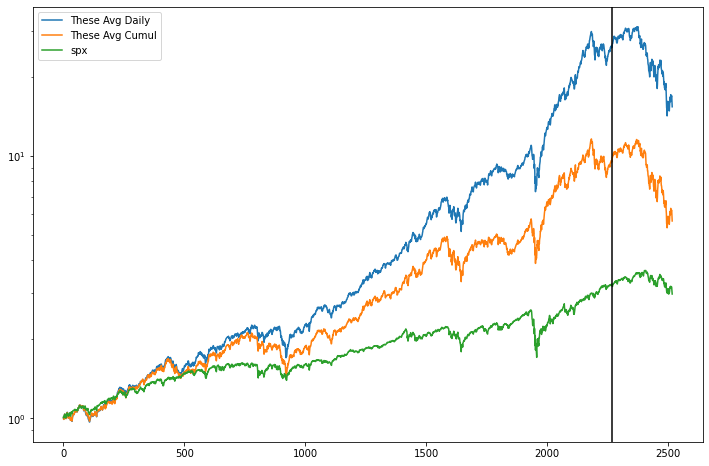

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-06-11,NaN,NaN
1,2012-06-12,1.005180,1.005180
2,2012-06-13,0.992324,0.992164
3,2012-06-14,1.000924,1.000798
4,2012-06-15,1.018877,1.018473


In [10]:
out.tail()

,Date,mine1,mine2
2513,2022-06-06,16.605083,6.110743
2514,2022-06-07,16.905892,6.228707
2515,2022-06-08,16.981494,6.202682
2516,2022-06-09,16.229443,5.961921
2517,2022-06-10,15.410538,5.657451


In [11]:
!ls ../data

dev_quantiles.csv    myHistoricTest.RData scoring.csv
historic.csv         nasdaq1965.csv       sp1950.csv
mine.csv             nya1965.csv          wilshire1990.csv
myHistoric.RData     pct_params


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

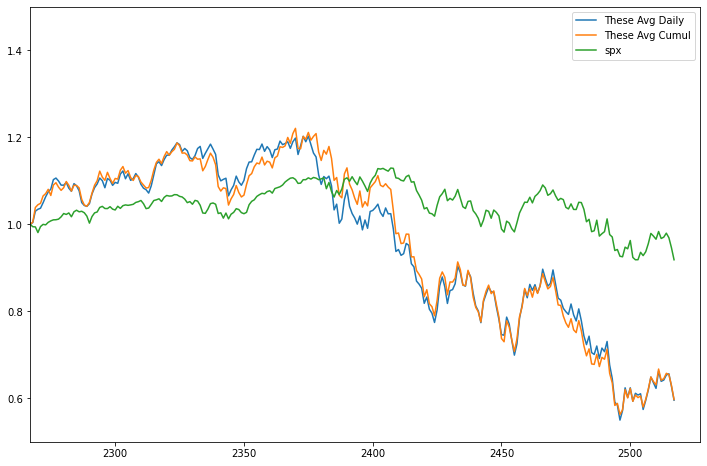

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.5, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
1350,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
1351,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
1352,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
1353,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
1354,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
1350,16.26,16.26,16.990,14.00
1351,15.26,15.26,16.399,15.12
1352,15.24,15.24,15.860,14.77
1353,13.73,13.73,15.430,13.62
1354,14.02,14.02,14.160,13.81


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
1350,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
1351,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
1352,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
1353,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
1354,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.988117
Name: HighMult, dtype: float64


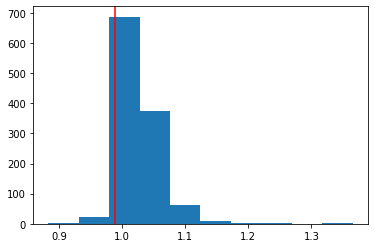

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0148142019592692


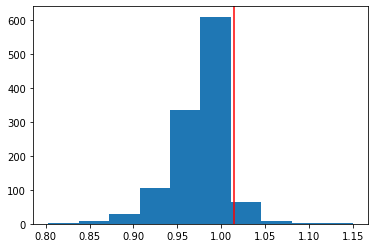

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0148142019592692, 0.9881173441746253)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0081571822301179, 0.9941611418642872)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
1350,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
1351,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
1352,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
1353,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
1354,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0113484064165927, 0.988707083641868, 1.0177439618628619, 0.9880190723630928)

In [27]:
get_hilo_mults(aapl)

(1.0061440409634326, 0.9956348850508439, 1.0095932084449422, 0.992701199340266)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.006144,0.995635,1.009593,0.992701
1,ABMD,1.003935,0.997203,1.004761,0.996750
2,ABNB,1.005575,0.994070,1.012241,0.983690
3,ADYEY,1.022793,0.981401,1.029146,0.968002
4,AMD,1.011680,0.992374,1.011047,0.991497


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,137.130005,AAPL
ABMD,250.429993,ABMD
ABNB,108.910004,ABNB
ADYEY,14.048,ADYEY
AMD,94.82,AMD
...,...,...
ZEN,65.010002,ZEN
ZNGA,NaN,ZNGA
^GSPC,3900.72998,^GSPC
^IXIC,11340.024414,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.006144,0.995635,1.009593,0.992701,137.130005
1,ABMD,1.003935,0.997203,1.004761,0.996750,250.429993
2,ABNB,1.005575,0.994070,1.012241,0.983690,108.910004
3,ADYEY,1.022793,0.981401,1.029146,0.968002,14.048
4,AMD,1.011680,0.992374,1.011047,0.991497,94.82


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv